In [27]:
#imports
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


Problem 1

LOAD DATA

In [28]:
#load the two datas
landsat_test = pd.read_csv('landsat_test.csv')
landsat_train = pd.read_csv('landsat_train.csv')
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


Visualize data

<Axes: xlabel='land_type'>

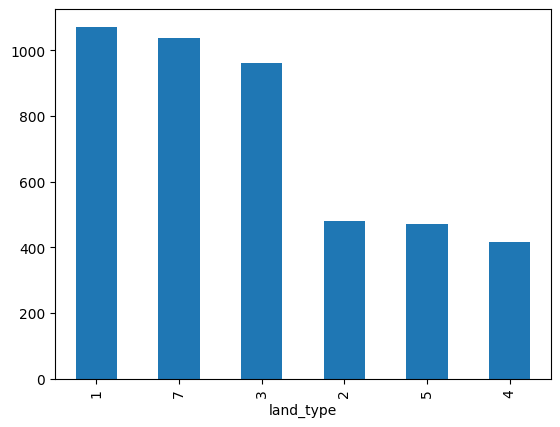

In [29]:
#create barplot to visualize the landtypes for train data
landsat_train['land_type'].value_counts().plot(kind='bar')

<Axes: xlabel='land_type'>

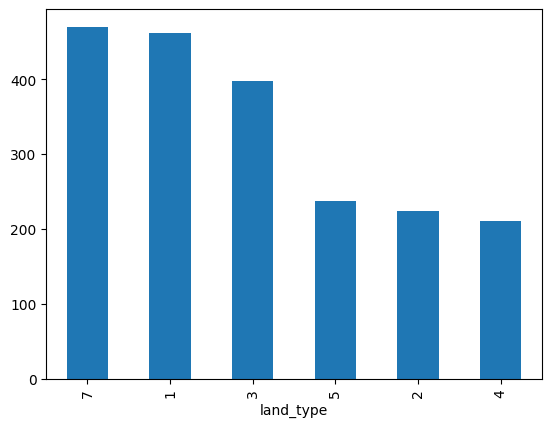

In [30]:
#create barplot to visualize the landtypes for test data
landsat_test['land_type'].value_counts().plot(kind='bar')

Train / test split x y data

In [31]:
#seprate into train test split
X_train = landsat_train.drop('land_type', axis=1)
y_train = landsat_train['land_type']
x_test = landsat_test.drop('land_type', axis=1)
y_test = landsat_test['land_type']

Create Pipline

In [45]:
#imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
#from last assignment
#create a column transformer that will minmax scale numerical values
columntransformer=ColumnTransformer([('numerical',MinMaxScaler(), X_train.columns)])
#create pipline that will transform data then will run the decisiontreeclassification algorithm
pipeline=Pipeline([('transformer',columntransformer),('classifier',DecisionTreeClassifier())])

Run the pipline


In [46]:
#run the pipiline to fit the decisiontreeclassifer
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', '...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Evaulate

In [48]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96       461
           2       0.98      0.97      0.98       224
           3       0.87      0.85      0.86       397
           4       0.52      0.56      0.54       211
           5       0.87      0.78      0.82       237
           7       0.82      0.83      0.83       470

    accuracy                           0.85      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.85      0.85      0.85      2000



In [49]:
#precison score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.8350088038858678

In [51]:
#recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.829156162573057

In [52]:
#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.8315612787015597

<Axes: >

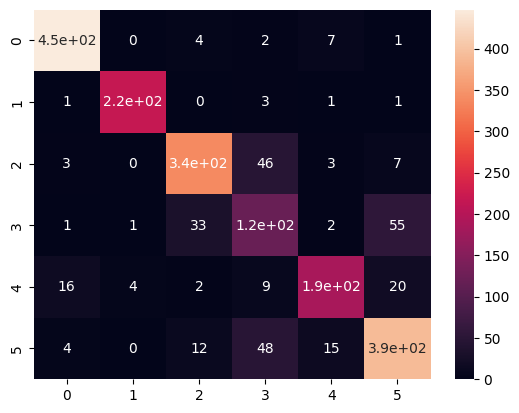

In [53]:
#heatmap of the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Well we can see that each of the scores is around the 80-84 mark which is pretty alright not the best but honestly could be much worse its acceptable. the heatmap shows a massive number in the middle of the confusion matrixes which could be improved using other models

Problem 2


Load the datas

In [54]:
#taken from above same thing but i like to make a second data varible to keep things more orginized in my mind
#load the two datas
landsat_test2 = pd.read_csv('landsat_test.csv')
landsat_train2 = pd.read_csv('landsat_train.csv')
landsat_test2.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


Train test split

In [55]:
#seprate into train test split
X_train2 = landsat_train2.drop('land_type', axis=1)
y_train2 = landsat_train2['land_type']
x_test2 = landsat_test2.drop('land_type', axis=1)
y_test2 = landsat_test2['land_type']

Building pipeline

In [61]:
#bagging classifier
from sklearn.ensemble import BaggingClassifier
#encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train2 = le.fit_transform(y_train2)
y_test2 = le.transform(y_test2)

In [57]:
columntransformer2=ColumnTransformer([('numerical',MinMaxScaler(), X_train2.columns)])
pipeline2=Pipeline([('transformer',columntransformer2),('classifier',DecisionTreeClassifier())])


In [62]:
#bagging pipline
bagging_pipline = Pipeline([('transformer',columntransformer2),('classifier',BaggingClassifier(DecisionTreeClassifier()))])


Execute the pipeline

In [63]:
bagging_pipline.fit(X_train2,y_train2)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', '...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('classifier',
                 BaggingClassifier(estimator=DecisionTreeClassifier()))])

Evaluate the pipeline

In [64]:
y_pred_bagging = bagging_pipline.predict(x_test2)
print(classification_report(y_test2, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       461
           1       0.96      0.97      0.97       224
           2       0.86      0.93      0.89       397
           3       0.66      0.59      0.62       211
           4       0.91      0.84      0.87       237
           5       0.86      0.85      0.86       470

    accuracy                           0.88      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.88      0.88      0.88      2000



In [65]:
#precison score
from sklearn.metrics import precision_score
precision_score(y_test2, y_pred_bagging, average='macro')

0.8689297933891252

In [66]:
#recall score
from sklearn.metrics import recall_score
recall_score(y_test2, y_pred_bagging, average='macro')

0.8605947187840699

In [67]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test2, y_pred_bagging, average='macro')


0.8639458979376099

<Axes: >

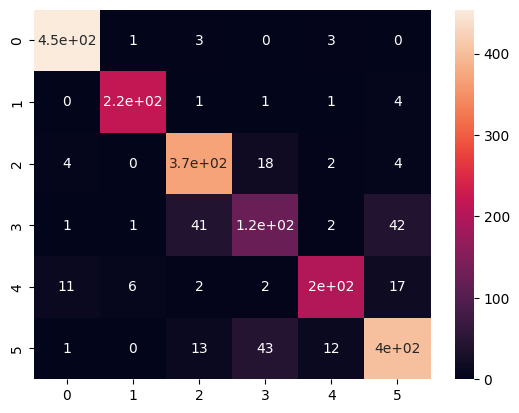

In [68]:
#heatmap of the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test2, y_pred_bagging)
sns.heatmap(cm, annot=True)

So for problem two i used the bagging classifier for the dataset. instead of like the first problem ending with a 80-84 range this problem with the bagging classifier all ended with a score of 86 which is a improvement to the last way we tryed to process the data

Problem 3

Load the data

In [88]:
data3=pd.read_csv('banknote_authentication (2).csv')
data3.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Train into test / split

In [89]:
#test split data
X_train3 = data3.drop('variance', axis=1)
y_train3 = data3['variance']

Building the pipline

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming 'class' column is in X_train3
# If not, adjust the numerical features accordingly
numerical_features = X_train3.select_dtypes(include=['number']).columns.tolist()

# Create a single ColumnTransformer with both numerical and categorical transformations
columntransformer2 = ColumnTransformer(
    transformers=[
        ('numerical', MinMaxScaler(), numerical_features),

    ])

# Create the pipeline
pipeline3 = Pipeline([('transformer', columntransformer2), ('classifier', RandomForestRegressor())])

Executing the model

In [98]:
pipeline3.fit(X_train3,y_train3)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical', MinMaxScaler(),
                                                  ['skewness', 'curtosis',
                                                   'entropy', 'forgery'])])),
                ('classifier', RandomForestRegressor())])

Evaluating the model

In [105]:
y_pred3 = pipeline3.predict(X_train3)
y_pred3

array([ 4.103323  ,  4.44381568,  3.550202  , ..., -3.733593  ,
       -3.693066  , -2.6485557 ])

In [106]:
#show the score of the prediction
from sklearn.metrics import r2_score
r2_score(y_train3, y_pred3)

0.9938846642233492

From this we are able to see that the score is super high using the randomtree pipline this should then be the best way to process and train this dataset we have since 99 is a pretty low margin of error